## Assignment 2: Classification 

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. \[You will learn about PCA in a later Lesson.\] Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

You can read more about the data and the variables [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [1]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, average_precision_score


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [2]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display the first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Question 2: /5 pts

Split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [3]:
# Assuming 'Class' is the target variable and all other columns are predictors
X_amount = df[['Amount']]  # Predictor variables
y = df['Class']  # Outcome/response variable

# Split the data into 50% train and 50% test
X_train_amount, X_test_amount, y_train, y_test = train_test_split(X_amount, y, test_size=0.5, random_state=0)

## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  

In no more than 2 sentences per bullet point, answer the following in your own words.

1. Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**YOUR ANSWER HERE:** Yes, LogisticRegression uses a penalty by default, which is the L2 penalty (also known as ridge regularization). This penalty helps to prevent overfitting by adding a regularization term to the loss function.
    
2. If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

**YOUR ANSWER HERE:** When a penalty is applied, the resulting coefficients are expected to be smaller in magnitude compared to those obtained without a penalty, as the regularization term encourages simpler models with reduced complexity. This can lead to improved generalization on unseen data.
    
3. If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**YOUR ANSWER HERE:** No, you should not include a column of 1s in your feature matrix when using the default settings of LogisticRegression, as it automatically includes an intercept term. Including a column of 1s would lead to an unnecessary duplication of the intercept, which could skew the results.


## Question 4: /15 pts

- Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.  I used `max_iter=10000` which seems to supress the warning.

- Using this object, **run a logisitic regression analysis** of `Class` (y-variable) against `Amount` (x-variable) using your training data. 

- Then **make a scatter-plot of `Amount` and `Outcome` on your test data** and add the class prediction (0 or 1, using `predict`) and the predicted probability of a positive outcome (using `predict_proba`). Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1).

C:\Users\Rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


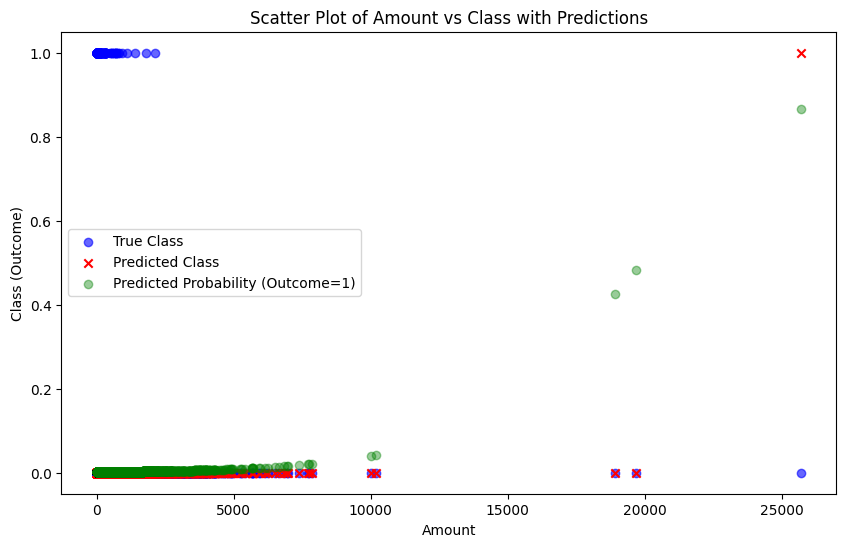

In [4]:
# Create LogisticRegression instance with max_iter set to suppress convergence warnings
log_reg_amount = LogisticRegression(max_iter=10000)

# Run logistic regression on 'Amount' as the predictor and 'Class' as the outcome
log_reg_amount.fit(X_train_amount, y_train)

# Make predictions on the test set
y_pred_class_amount = log_reg_amount.predict(X_test_amount)  # Predicted class (0 or 1)
y_pred_proba_amount = log_reg_amount.predict_proba(X_test_amount)[:, 1]  # Predicted probability of Outcome=1

# Create a scatter plot for Amount and Outcome on the test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test_amount['Amount'], y_test, label='True Class', c='blue', alpha=0.6)
plt.scatter(X_test_amount['Amount'], y_pred_class_amount, label='Predicted Class', marker='x', c='red')
plt.scatter(X_test_amount['Amount'], y_pred_proba_amount, label='Predicted Probability (Outcome=1)', marker='o', c='green', alpha=0.4)

# Add labels and title
plt.xlabel('Amount')
plt.ylabel('Class (Outcome)')
plt.title('Scatter Plot of Amount vs Class with Predictions')
plt.legend()
plt.show()

## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your amount-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER HERE:** There was 1 test instance that was correctly labelled as a positive prediction.

* Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

**YOUR ANSWER HERE:** The one instance that was positively-labeled was for the amount of 25691.16 and its associated predicted probability was 0.8669061249819598. The classifier had labeled this amount positive because its predicted probability was above the threshold of 0.5 which we set above.

* Is this classifier useful for finding fraudulent transactions? Explain in one or two sentences.

**YOUR ANSWER HERE:** This classifier is not currently useful for finding fraudulent transactions. Even though it labeled one transaction as a positive instance of fraud, it didn't correctly identify transactions that are fraudulent (as we can see both the recall and precision are 0 which led to an F1-score also being 0).

In [10]:
# 5. a)
# Using y_pred_class_amount to count how many predicted classes were labeled 1 (for fraud)
positive_predictions = np.sum(y_pred_class_amount == 1)
print("Positive Predictions: ", positive_predictions)

# 5. b)
# Retreiving all the locations in y_pred_class_amount where a positive prediction was made
positive_locations = np.where(y_pred_class_amount == 1)[0]

# Selecting one location (in this case we chose the first found location)
chosen_index = positive_locations[0]

# Show the Amount and predicted probability for this particular instance
chosen_amount = X_test_amount.iloc[chosen_index]['Amount']
chosen_proba = y_pred_proba_amount[chosen_index]

print("Chosen Amount: ", chosen_amount)
print("Chosen Probability: ", chosen_proba)

# 5. c)
# Making a confusion matrix and printing it
conf_matrix = confusion_matrix(y_test, y_pred_class_amount)
print("Confusion Matrix:\n", conf_matrix)

# Not useful until there are a good amount of true positives (correctly predicted frauds) (in our case now, we only have one true positive)
from sklearn.metrics import precision_score, recall_score, f1_score

# Finding precision, recall, and F1-score to aid in finding overall performance
precision = precision_score(y_test, y_pred_class_amount)
recall = recall_score(y_test, y_pred_class_amount)
f1 = f1_score(y_test, y_pred_class_amount)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Positive Predictions:  1
Chosen Amount:  25691.16
Chosen Probability:  0.8669061249819598
Confusion Matrix:
 [[142160      1]
 [   243      0]]
Precision:  0.0
Recall:  0.0
F1 Score:  0.0


## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

* According to this more complex model, are larger or smaller Amounts more strongly associated with fraud, if all other variables are held equal?

**YOUR ANSWER HERE:** 

In [20]:
# Use all variables except 'Class' as predictors
X_all = df.drop(columns=['Class']) 
y = df['Class'] 

# Split the dataset into training and test sets (50% holdout)
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.5, random_state=0)

# Create the logistic regression model
log_reg_all_vars = LogisticRegression(max_iter=10000)

# Fit the model on the training data
log_reg_all_vars.fit(X_train_all, y_train)


LogisticRegression(max_iter=10000)

## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER:** 

* Is this classifier **better or worse than the amount-only classifier** for finding fraudulent transactions? Explain in one or two sentences.*

**YOUR ANSWER:** 

# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

1. Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**YOUR ANSWER:** The all-variables classifier has a higher estimated probability of correctly distinguishing between positive and negative instances, as indicated by its higher AUC value of 0.93.

2. How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

**YOUR ANSWER:** A logistic regression classifier producing an AUROC worse than random (less than 0.5) - like our amount-only classifier - on its training set may arise from mislabeling of data, where incorrect labels lead the model to learn wrong associations, resulting in poor predictions. It could also stem from using irrelevant features, causing the model to fail in capturing meaningful patterns, or overfitting to noise if the model is too complex for the data.

Additionally, errors in model setup or parameter configuration can negatively affect performance. Also, class imbalance may lead the model to predict the majority class too often, resulting in an AUROC below 0.5. Overall, an AUROC that is less than 0.5 suggests the model is misunderstanding the data due to quality, feature relevance, or implementation issues.


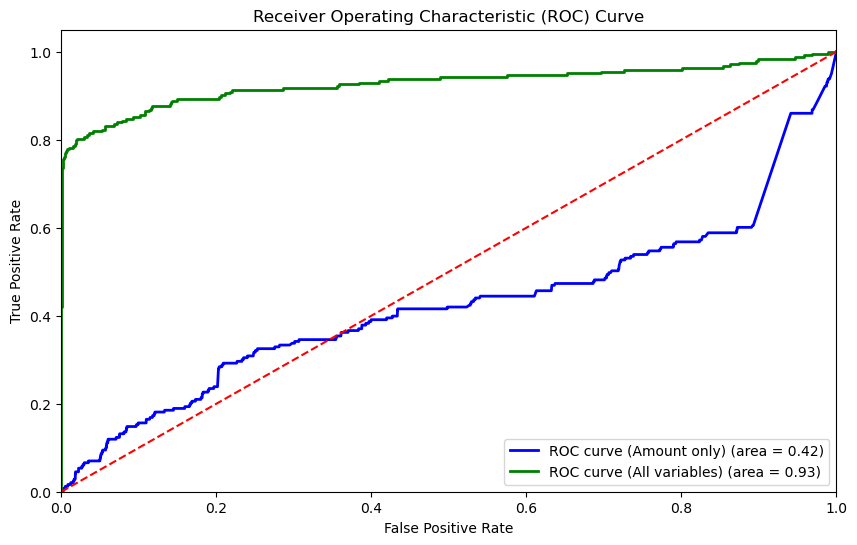

In [17]:
# Get predicted probabilities (for ROC curve)
y_pred_proba_all = log_reg_all_vars.predict_proba(X_test_all)[:, 1]      # Probabilities for 'All variables' model

# Compute ROC curve and AUC for both models
fpr_amount, tpr_amount, _ = roc_curve(y_test, y_pred_proba_amount)
roc_auc_amount = auc(fpr_amount, tpr_amount)

fpr_all, tpr_all, _ = roc_curve(y_test, y_pred_proba_all)
roc_auc_all = auc(fpr_all, tpr_all)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_amount, tpr_amount, color='blue', lw=2, label=f'ROC curve (Amount only) (area = {roc_auc_amount:.2f})')
plt.plot(fpr_all, tpr_all, color='green', lw=2, label=f'ROC curve (All variables) (area = {roc_auc_all:.2f})')

# Plot random classifier line (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Add labels, title, and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 60% of fraudulent transactions?

**YOUR ANSWER:** The all-variables classifer is preferable if we want to recover at least 60% of fraudulent transactions since its average precision score is 0.64 (64%).


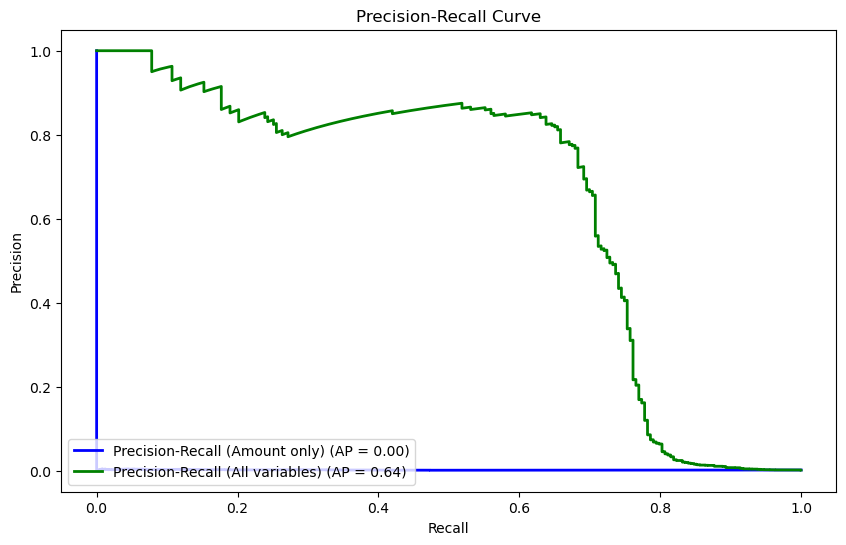

In [18]:
# Get precision-recall data for both models
precision_amount, recall_amount, _ = precision_recall_curve(y_test, log_reg_amount.predict_proba(X_test_amount)[:, 1])
average_precision_amount = average_precision_score(y_test, log_reg_amount.predict_proba(X_test_amount)[:, 1])

precision_all, recall_all, _ = precision_recall_curve(y_test, log_reg_all_vars.predict_proba(X_test_all)[:, 1])
average_precision_all = average_precision_score(y_test, log_reg_all_vars.predict_proba(X_test_all)[:, 1])

# Plot precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_amount, precision_amount, color='blue', lw=2, label=f'Precision-Recall (Amount only) (AP = {average_precision_amount:.2f})')
plt.plot(recall_all, precision_all, color='green', lw=2, label=f'Precision-Recall (All variables) (AP = {average_precision_all:.2f})')

# Add labels, title, and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
